**id: label** <br>
1: seagrass  <br>
2: trash  <br>
3: other coral dead  <br>
4: other coral bleached  <br>
5: sand  <br>
6: other coral alive  <br>
7: human  <br>
8: transect tools  <br>
9: fish  <br>
10: algae covered substrate  <br>
11: other animal  <br>
12: unknown hard substrate  <br>
13: background  <br>
14: dark  <br>
15: transect line  <br>
16: massive/meandering bleached  <br>
17: massive/meandering alive  <br>
18: rubble  <br>
19: branching bleached  <br>
20: branching dead  <br>
21: millepora  <br>
22: branching alive  <br>
23: massive/meandering dead  <br>
24: clam  <br>
25: acropora alive  <br>
26: sea cucumber  <br>
27: turbinaria  <br>
28: table acropora alive  <br>
29: sponge  <br>
30: anemone  <br>
31: pocillopora alive  <br>
32: table acropora dead  <br>
33: meandering bleached  <br>
34: stylophora alive  <br>
35: sea urchin  <br>
36: meandering alive  <br>
37: meandering dead  <br>
38: crown of thorn  <br>
39: dead clam  <br>

So if we want to get an idea of the % of bleached coral in an label_array, we should divide the number of pixels of bleached corals by the number of pixels of alive corals + bleached corals. <br>
The label ids of bleached corals are [4,16,19,33]. The label ids of alive corals are [6,17,22,31,36].


In [ ]:
from datasets import load_dataset
from datasets.dataset_dict import DatasetDict, IterableDataset, IterableDatasetDict, Dataset
import numpy as np
import numpy.typing as npt
from typing import Any
import matplotlib.pyplot as plt

# Download the dataset
ds: DatasetDict = load_dataset("EPFL-ECEO/coralscapes") # type: ignore

# Remove any images that don't have any alive coral
coral_id_list: list[int] = [6, 17, 22, 31, 36]
def contains_coral(example: Any) -> np.bool[bool]:
    mask: npt.NDArray[Any] = np.array(example["label"])
    return np.isin(mask, coral_id_list).any()

filtered_ds: DatasetDict = {} # type: ignore
for split in ds:
    filtered_ds[split] = ds[split].filter(contains_coral)
filtered_ds

Filter: 100%|██████████| 392/392 [00:23<00:00, 16.77 examples/s]


{'train': Dataset({
     features: ['image', 'label'],
     num_rows: 1366
 }),
 'validation': Dataset({
     features: ['image', 'label'],
     num_rows: 152
 }),
 'test': Dataset({
     features: ['image', 'label'],
     num_rows: 333
 })}

(1.0, 100.0)

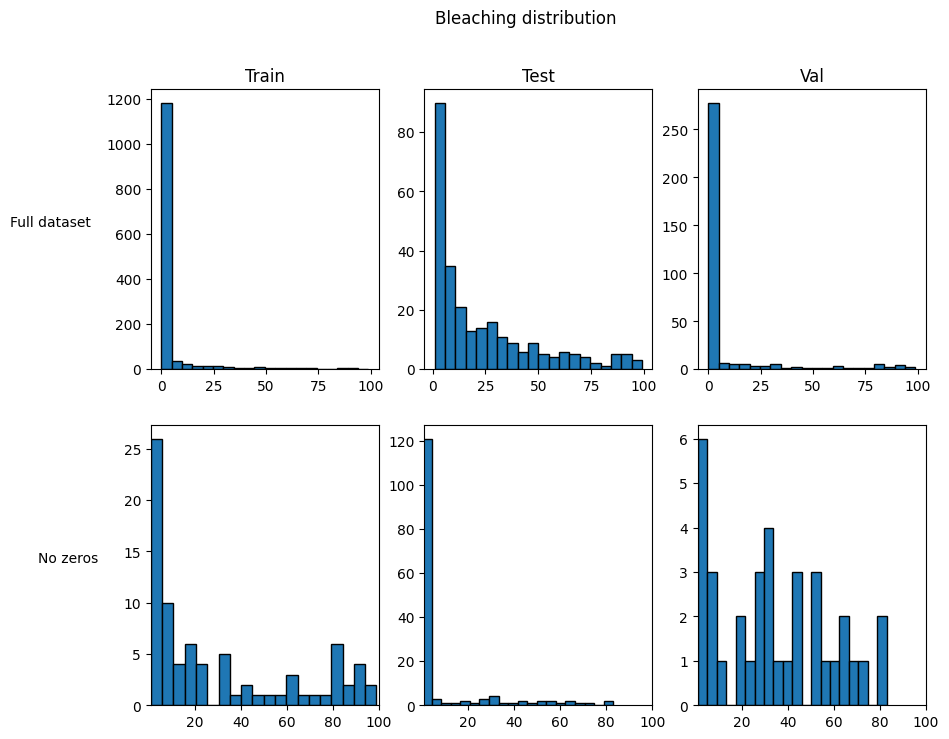

In [136]:
import numpy as np
import numpy.typing as npt
from typing import Any
import matplotlib.pyplot as plt

def get_bleached_percentage(label: Any) -> float:
    label_array:npt.NDArray[np.int8] = np.array(label)
    
    # Sum pixel count of all bleached coral labels
    bleached_pixel_count: int = np.count_nonzero(label_array == 4) + \
    np.count_nonzero(label_array == 16) + \
    np.count_nonzero(label_array == 19) + \
    np.count_nonzero(label_array == 33)

    # Sum pixel count of all alive coral labels
    alive_pixel_count: int = np.count_nonzero(label_array == 6) + \
    np.count_nonzero(label_array == 17) + \
    np.count_nonzero(label_array == 22) + \
    np.count_nonzero(label_array == 31) + \
    np.count_nonzero(label_array == 36)

    return round(bleached_pixel_count / (alive_pixel_count+bleached_pixel_count) * 100, 0)

# Create bleaching data for full dataset
train_bleach_percentage_list: list[float] = []
train_bleach_percentage_no_zero_list: list[float] = []
for label in filtered_ds["train"]["label"]:
    bleached_percentage: float = get_bleached_percentage(label)
    if bleached_percentage != 0:
        train_bleach_percentage_no_zero_list.append(bleached_percentage)
    train_bleach_percentage_list.append(bleached_percentage)

test_bleach_percentage_list: list[float] = []
test_bleach_percentage_no_zero_list: list[float] = []
for label in filtered_ds["test"]["label"]:
    bleached_percentage: float = get_bleached_percentage(label)
    if bleached_percentage != 0:
        test_bleach_percentage_no_zero_list.append(bleached_percentage)
    test_bleach_percentage_list.append(bleached_percentage)

val_bleach_percentage_list: list[float] = []
val_bleach_percentage_no_zero_list: list[float] = []
for label in filtered_ds["validation"]["label"]:
    bleached_percentage: float = get_bleached_percentage(label)
    if bleached_percentage != 0:
        val_bleach_percentage_no_zero_list.append(bleached_percentage)
    val_bleach_percentage_list.append(bleached_percentage)

# Plot findings
fig, ax = plt.subplots(2, 3, figsize=(10,8))
fig.suptitle("Bleaching distribution")
ax[0,0].hist(x=train_bleach_percentage_list, bins=20, edgecolor="black")
ax[0,0].set_ylabel("Full dataset", rotation="horizontal", labelpad=40)
ax[0,0].set_title("Train")
ax[0,1].hist(x=train_bleach_percentage_no_zero_list, bins=20, edgecolor="black")
ax[0,1].set_title("Test")
ax[0,2].hist(x=test_bleach_percentage_list, bins=20, edgecolor="black")
ax[0,2].set_title("Val")
ax[1,0].hist(x=test_bleach_percentage_no_zero_list, bins=20, edgecolor="black")
ax[1,0].set_xlim([1,100])
ax[1,0].set_ylabel("No zeros", rotation="horizontal", labelpad=40)
ax[1,1].hist(x=val_bleach_percentage_list, bins=20, edgecolor="black")
ax[1,1].set_xlim([1,100])
ax[1,2].hist(x=val_bleach_percentage_no_zero_list, bins=20, edgecolor="black")
ax[1,2].set_xlim([1,100])